<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_jhu_csse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# !apt-get -qq install python-cartopy python3-cartopy

In [2]:
# import cartopy.crs as ccrs
import json
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np
plt.close('all')
plt.xkcd()

In [0]:
# run all requests for summary
api = request.get('https://covid19.mathdro.id/api')
confirmed = request.get('https://covid19.mathdro.id/api/confirmed')
deaths = request.get('https://covid19.mathdro.id/api/deaths')
us_confirmed = request.get('https://covid19.mathdro.id/api/countries/USA/confirmed')
ph_confirmed = request.get('https://covid19.mathdro.id/api/countries/Philippines/confirmed')

In [4]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-06-02 13:23:24.022124


In [0]:
# state population data from https://datausa.io/api/data?drilldowns=State&measures=Population&year=latest
# included here as string because no reason to make calls on 2 year old data
us_pop = '[{"ID State":"04000US30","State":"Montana","ID Year":2018,"Year":"2018","Population":1062305,"Slug State":"montana"},{"ID State":"04000US01","State":"Alabama","ID Year":2018,"Year":"2018","Population":4887871,"Slug State":"alabama"},{"ID State":"04000US04","State":"Arizona","ID Year":2018,"Year":"2018","Population":7171646,"Slug State":"arizona"},{"ID State":"04000US05","State":"Arkansas","ID Year":2018,"Year":"2018","Population":3013825,"Slug State":"arkansas"},{"ID State":"04000US06","State":"California","ID Year":2018,"Year":"2018","Population":39557045,"Slug State":"california"},{"ID State":"04000US08","State":"Colorado","ID Year":2018,"Year":"2018","Population":5695564,"Slug State":"colorado"},{"ID State":"04000US09","State":"Connecticut","ID Year":2018,"Year":"2018","Population":3572665,"Slug State":"connecticut"},{"ID State":"04000US10","State":"Delaware","ID Year":2018,"Year":"2018","Population":967171,"Slug State":"delaware"},{"ID State":"04000US11","State":"District of Columbia","ID Year":2018,"Year":"2018","Population":702455,"Slug State":"district-of-columbia"},{"ID State":"04000US12","State":"Florida","ID Year":2018,"Year":"2018","Population":21299325,"Slug State":"florida"},{"ID State":"04000US13","State":"Georgia","ID Year":2018,"Year":"2018","Population":10519475,"Slug State":"georgia"},{"ID State":"04000US15","State":"Hawaii","ID Year":2018,"Year":"2018","Population":1420491,"Slug State":"hawaii"},{"ID State":"04000US16","State":"Idaho","ID Year":2018,"Year":"2018","Population":1754208,"Slug State":"idaho"},{"ID State":"04000US17","State":"Illinois","ID Year":2018,"Year":"2018","Population":12741080,"Slug State":"illinois"},{"ID State":"04000US18","State":"Indiana","ID Year":2018,"Year":"2018","Population":6691878,"Slug State":"indiana"},{"ID State":"04000US19","State":"Iowa","ID Year":2018,"Year":"2018","Population":3156145,"Slug State":"iowa"},{"ID State":"04000US20","State":"Kansas","ID Year":2018,"Year":"2018","Population":2911510,"Slug State":"kansas"},{"ID State":"04000US21","State":"Kentucky","ID Year":2018,"Year":"2018","Population":4468402,"Slug State":"kentucky"},{"ID State":"04000US22","State":"Louisiana","ID Year":2018,"Year":"2018","Population":4659978,"Slug State":"louisiana"},{"ID State":"04000US23","State":"Maine","ID Year":2018,"Year":"2018","Population":1338404,"Slug State":"maine"},{"ID State":"04000US24","State":"Maryland","ID Year":2018,"Year":"2018","Population":6042718,"Slug State":"maryland"},{"ID State":"04000US25","State":"Massachusetts","ID Year":2018,"Year":"2018","Population":6902149,"Slug State":"massachusetts"},{"ID State":"04000US26","State":"Michigan","ID Year":2018,"Year":"2018","Population":9995915,"Slug State":"michigan"},{"ID State":"04000US27","State":"Minnesota","ID Year":2018,"Year":"2018","Population":5611179,"Slug State":"minnesota"},{"ID State":"04000US28","State":"Mississippi","ID Year":2018,"Year":"2018","Population":2986530,"Slug State":"mississippi"},{"ID State":"04000US29","State":"Missouri","ID Year":2018,"Year":"2018","Population":6126452,"Slug State":"missouri"},{"ID State":"04000US02","State":"Alaska","ID Year":2018,"Year":"2018","Population":737438,"Slug State":"alaska"},{"ID State":"04000US31","State":"Nebraska","ID Year":2018,"Year":"2018","Population":1929268,"Slug State":"nebraska"},{"ID State":"04000US32","State":"Nevada","ID Year":2018,"Year":"2018","Population":3034392,"Slug State":"nevada"},{"ID State":"04000US33","State":"New Hampshire","ID Year":2018,"Year":"2018","Population":1356458,"Slug State":"new-hampshire"},{"ID State":"04000US34","State":"New Jersey","ID Year":2018,"Year":"2018","Population":8908520,"Slug State":"new-jersey"},{"ID State":"04000US35","State":"New Mexico","ID Year":2018,"Year":"2018","Population":2095428,"Slug State":"new-mexico"},{"ID State":"04000US36","State":"New York","ID Year":2018,"Year":"2018","Population":19542209,"Slug State":"new-york"},{"ID State":"04000US37","State":"North Carolina","ID Year":2018,"Year":"2018","Population":10383620,"Slug State":"north-carolina"},{"ID State":"04000US38","State":"North Dakota","ID Year":2018,"Year":"2018","Population":760077,"Slug State":"north-dakota"},{"ID State":"04000US39","State":"Ohio","ID Year":2018,"Year":"2018","Population":11689442,"Slug State":"ohio"},{"ID State":"04000US40","State":"Oklahoma","ID Year":2018,"Year":"2018","Population":3943079,"Slug State":"oklahoma"},{"ID State":"04000US41","State":"Oregon","ID Year":2018,"Year":"2018","Population":4190713,"Slug State":"oregon"},{"ID State":"04000US42","State":"Pennsylvania","ID Year":2018,"Year":"2018","Population":12807060,"Slug State":"pennsylvania"},{"ID State":"04000US44","State":"Rhode Island","ID Year":2018,"Year":"2018","Population":1057315,"Slug State":"rhode-island"},{"ID State":"04000US45","State":"South Carolina","ID Year":2018,"Year":"2018","Population":5084127,"Slug State":"south-carolina"},{"ID State":"04000US46","State":"South Dakota","ID Year":2018,"Year":"2018","Population":882235,"Slug State":"south-dakota"},{"ID State":"04000US47","State":"Tennessee","ID Year":2018,"Year":"2018","Population":6770010,"Slug State":"tennessee"},{"ID State":"04000US48","State":"Texas","ID Year":2018,"Year":"2018","Population":28701845,"Slug State":"texas"},{"ID State":"04000US49","State":"Utah","ID Year":2018,"Year":"2018","Population":3161105,"Slug State":"utah"},{"ID State":"04000US50","State":"Vermont","ID Year":2018,"Year":"2018","Population":626299,"Slug State":"vermont"},{"ID State":"04000US51","State":"Virginia","ID Year":2018,"Year":"2018","Population":8517685,"Slug State":"virginia"},{"ID State":"04000US53","State":"Washington","ID Year":2018,"Year":"2018","Population":7535591,"Slug State":"washington"},{"ID State":"04000US54","State":"West Virginia","ID Year":2018,"Year":"2018","Population":1805832,"Slug State":"west-virginia"},{"ID State":"04000US55","State":"Wisconsin","ID Year":2018,"Year":"2018","Population":5813568,"Slug State":"wisconsin"},{"ID State":"04000US56","State":"Wyoming","ID Year":2018,"Year":"2018","Population":577737,"Slug State":"wyoming"},{"ID State":"04000US72","State":"Puerto Rico","ID Year":2018,"Year":"2018","Population":3195153,"Slug State":"puerto-rico"}]'
pop = pd.DataFrame.from_dict(json.loads(us_pop))

In [0]:
# All States
states = pop['State'].tolist()
states.sort()

In [0]:
us = pd.DataFrame.from_dict(us_confirmed.json())

In [0]:
def state_chart(state_name, deaths_perc_of_confirmed):
    labels = 'Confirmed', 'Deaths'
    sizes = [100 - deaths_perc_of_confirmed, deaths_perc_of_confirmed]
    explode = (0, 0.1)

    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    plt.title('{0} State Confirmed Cases'.format(state_name))
    ax1.axis('equal')

    plt.show()

In [0]:
def state_details(state_name):
    state = us.loc[us['provinceState'] == state_name]
    p = pop.loc[pop['State'] == state_name]

    population = p['Population'].sum()
    confirmed = state['confirmed'].sum()
    deaths = state['deaths'].sum()

    confirmed_perc_of_pop = (confirmed/population) * 100
    deaths_perc_of_confirmed = (deaths/confirmed) * 100

    state_chart(state_name, deaths_perc_of_confirmed)

    print('{0} State Total Population'.format(state_name))
    print(p['Population'].sum())
    print('{0} State Confirmed'.format(state_name))
    print('{0} ({1}% of population)'.format(confirmed, confirmed_perc_of_pop))
    print('{0} State Deaths'.format(state_name))
    print('{0} ({1}% of confirmed)'.format(deaths, deaths_perc_of_confirmed))
    print('')

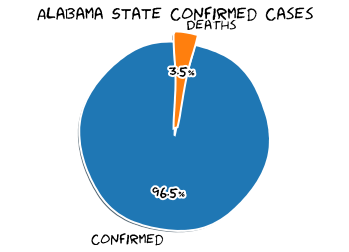

Alabama State Total Population
4887871
Alabama State Confirmed
18630 (0.3811475384681797% of population)
Alabama State Deaths
646 (3.4675254965110036% of confirmed)



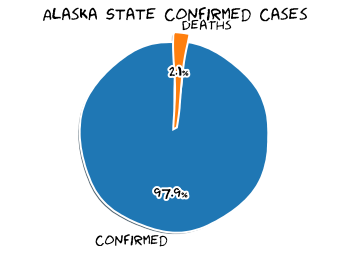

Alaska State Total Population
737438
Alaska State Confirmed
466 (0.06319175306941058% of population)
Alaska State Deaths
10 (2.1459227467811157% of confirmed)



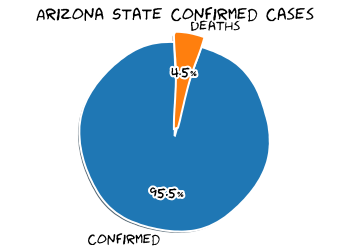

Arizona State Total Population
7171646
Arizona State Confirmed
20129 (0.280674757231464% of population)
Arizona State Deaths
915 (4.545680361667246% of confirmed)



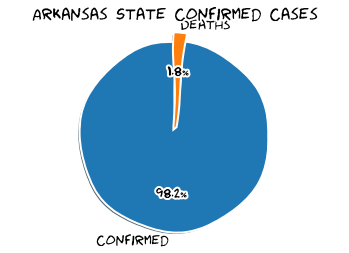

Arkansas State Total Population
3013825
Arkansas State Confirmed
7443 (0.2469619171650643% of population)
Arkansas State Deaths
133 (1.786913878812307% of confirmed)



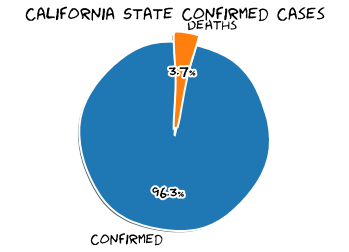

California State Total Population
39557045
California State Confirmed
114993 (0.29070169422412623% of population)
California State Deaths
4220 (3.669788595827572% of confirmed)



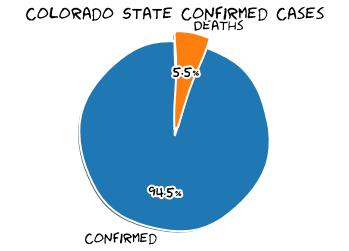

Colorado State Total Population
5695564
Colorado State Confirmed
26563 (0.4663805024401446% of population)
Colorado State Deaths
1458 (5.488837857169748% of confirmed)



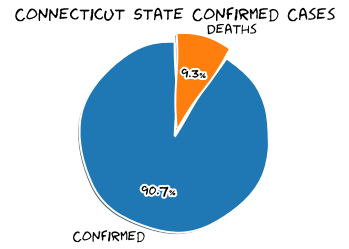

Connecticut State Total Population
3572665
Connecticut State Confirmed
42740 (1.1963058389185663% of population)
Connecticut State Deaths
3970 (9.28872250818905% of confirmed)



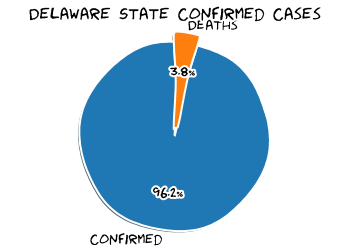

Delaware State Total Population
967171
Delaware State Confirmed
9605 (0.9931025640760528% of population)
Delaware State Deaths
368 (3.831337844872462% of confirmed)



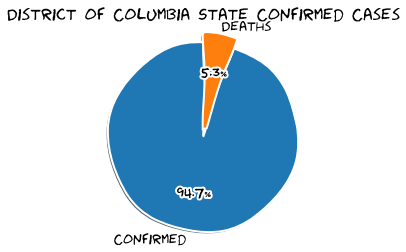

District of Columbia State Total Population
702455
District of Columbia State Confirmed
8857 (1.2608636852182702% of population)
District of Columbia State Deaths
468 (5.283956192841821% of confirmed)



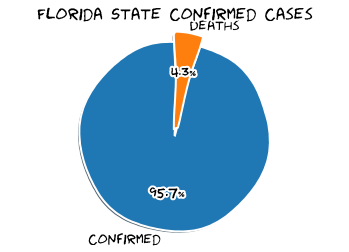

Florida State Total Population
21299325
Florida State Confirmed
56830 (0.26681596717266864% of population)
Florida State Deaths
2460 (4.32869963047686% of confirmed)



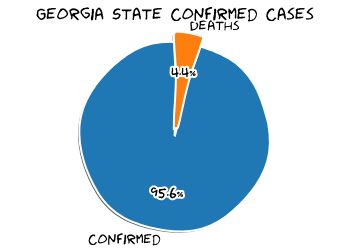

Georgia State Total Population
10519475
Georgia State Confirmed
47899 (0.4553364117505864% of population)
Georgia State Deaths
2089 (4.361260151568926% of confirmed)



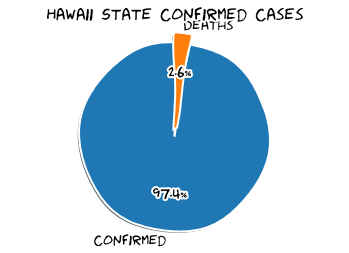

Hawaii State Total Population
1420491
Hawaii State Confirmed
652 (0.045899622032100164% of population)
Hawaii State Deaths
17 (2.607361963190184% of confirmed)



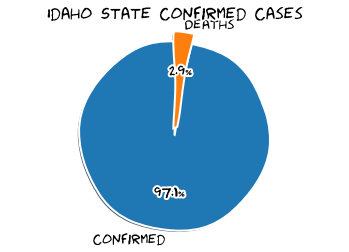

Idaho State Total Population
1754208
Idaho State Confirmed
2839 (0.1618394169904595% of population)
Idaho State Deaths
82 (2.8883409651285663% of confirmed)



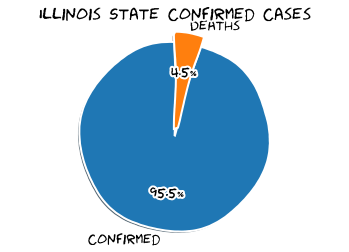

Illinois State Total Population
12741080
Illinois State Confirmed
121234 (0.9515205932307153% of population)
Illinois State Deaths
5412 (4.464094230991306% of confirmed)



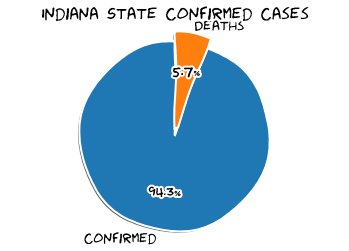

Indiana State Total Population
6691878
Indiana State Confirmed
34830 (0.5204816943763768% of population)
Indiana State Deaths
1976 (5.6732701693942005% of confirmed)



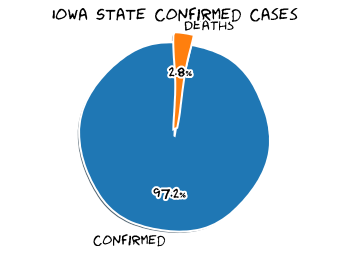

Iowa State Total Population
3156145
Iowa State Confirmed
19699 (0.6241474963919592% of population)
Iowa State Deaths
555 (2.8174018985735314% of confirmed)



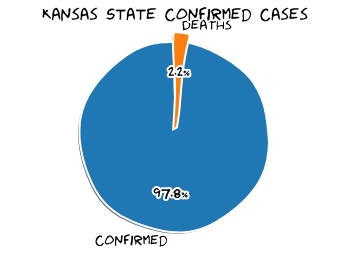

Kansas State Total Population
2911510
Kansas State Confirmed
9920 (0.3407166727917816% of population)
Kansas State Deaths
217 (2.1875% of confirmed)



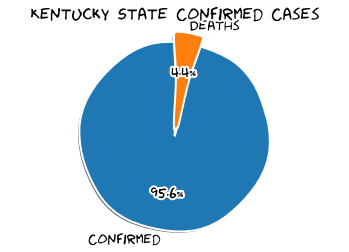

Kentucky State Total Population
4468402
Kentucky State Confirmed
10046 (0.22482310230816296% of population)
Kentucky State Deaths
439 (4.369898467051563% of confirmed)



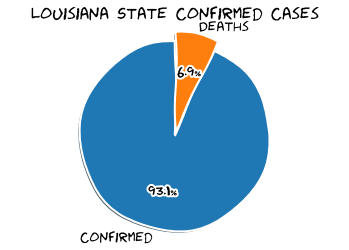

Louisiana State Total Population
4659978
Louisiana State Confirmed
40341 (0.8656907822311608% of population)
Louisiana State Deaths
2801 (6.943308296770036% of confirmed)



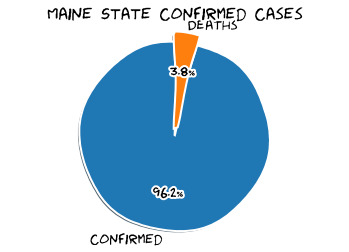

Maine State Total Population
1338404
Maine State Confirmed
2349 (0.1755075448070986% of population)
Maine State Deaths
89 (3.7888463175819496% of confirmed)



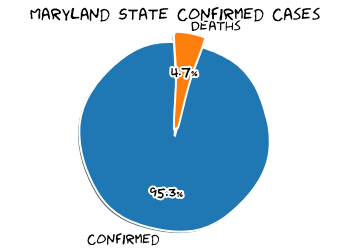

Maryland State Total Population
6042718
Maryland State Confirmed
53327 (0.8825002258917263% of population)
Maryland State Deaths
2506 (4.699308042830086% of confirmed)



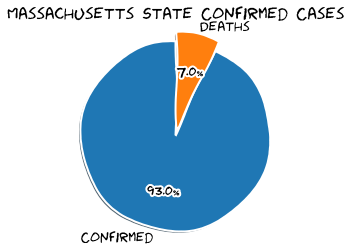

Massachusetts State Total Population
6902149
Massachusetts State Confirmed
100805 (1.460487161317439% of population)
Massachusetts State Deaths
7035 (6.978820495015128% of confirmed)



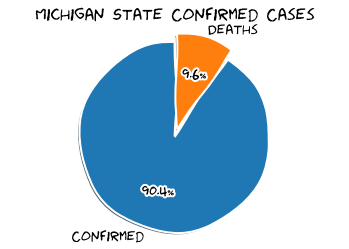

Michigan State Total Population
9995915
Michigan State Confirmed
57532 (0.5755551142641769% of population)
Michigan State Deaths
5516 (9.587707710491552% of confirmed)



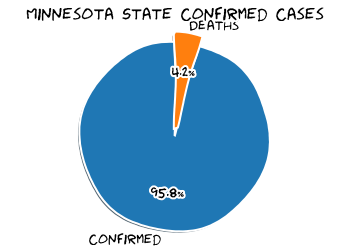

Minnesota State Total Population
5611179
Minnesota State Confirmed
25208 (0.4492460497161114% of population)
Minnesota State Deaths
1060 (4.205014281180578% of confirmed)



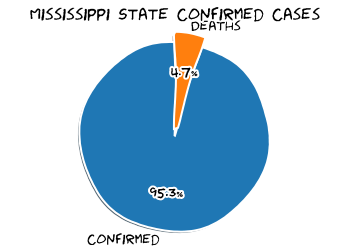

Mississippi State Total Population
2986530
Mississippi State Confirmed
15752 (0.5274348491393022% of population)
Mississippi State Deaths
739 (4.691467750126968% of confirmed)



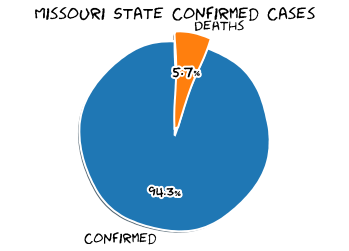

Missouri State Total Population
6126452
Missouri State Confirmed
13724 (0.224012201515657% of population)
Missouri State Deaths
776 (5.654328184202857% of confirmed)



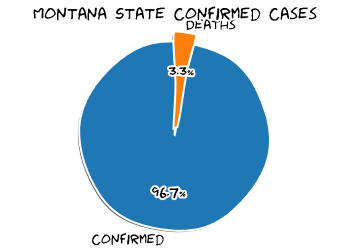

Montana State Total Population
1062305
Montana State Confirmed
519 (0.04885602534112143% of population)
Montana State Deaths
17 (3.275529865125241% of confirmed)



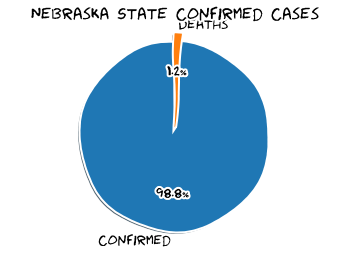

Nebraska State Total Population
1929268
Nebraska State Confirmed
14345 (0.7435462569223146% of population)
Nebraska State Deaths
170 (1.1850819100731962% of confirmed)



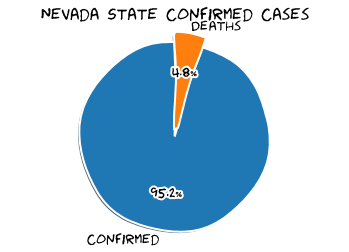

Nevada State Total Population
3034392
Nevada State Confirmed
8702 (0.28677903184558884% of population)
Nevada State Deaths
415 (4.769018616410021% of confirmed)



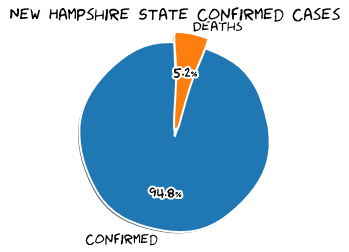

New Hampshire State Total Population
1356458
New Hampshire State Confirmed
4685 (0.34538481840204416% of population)
New Hampshire State Deaths
245 (5.229455709711846% of confirmed)



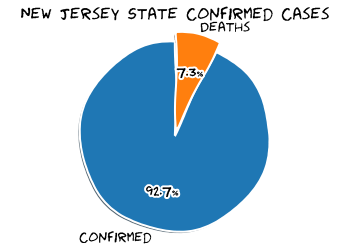

New Jersey State Total Population
8908520
New Jersey State Confirmed
160918 (1.8063382020807046% of population)
New Jersey State Deaths
11723 (7.285076871450055% of confirmed)



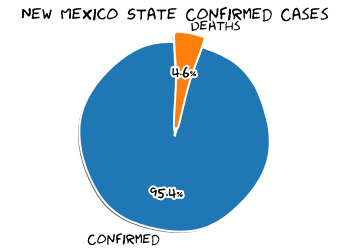

New Mexico State Total Population
2095428
New Mexico State Confirmed
7800 (0.3722389888843711% of population)
New Mexico State Deaths
362 (4.6410256410256405% of confirmed)



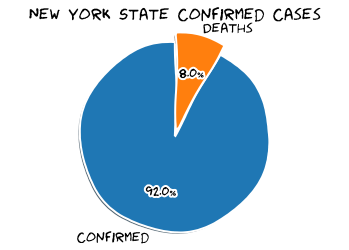

New York State Total Population
19542209
New York State Confirmed
371711 (1.9020930540656893% of population)
New York State Deaths
29917 (8.04845700019639% of confirmed)



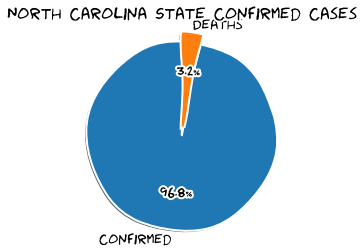

North Carolina State Total Population
10383620
North Carolina State Confirmed
29592 (0.28498731656204673% of population)
North Carolina State Deaths
948 (3.2035685320356855% of confirmed)



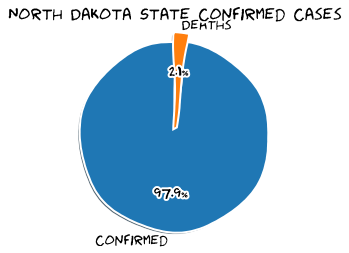

North Dakota State Total Population
760077
North Dakota State Confirmed
2625 (0.3453597464467416% of population)
North Dakota State Deaths
55 (2.0952380952380953% of confirmed)



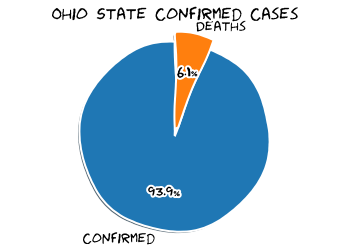

Ohio State Total Population
11689442
Ohio State Confirmed
35984 (0.30783334225876646% of population)
Ohio State Deaths
2207 (6.133281458425967% of confirmed)



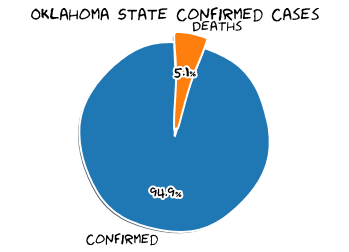

Oklahoma State Total Population
3943079
Oklahoma State Confirmed
6573 (0.1666971420050169% of population)
Oklahoma State Deaths
334 (5.081393579796136% of confirmed)



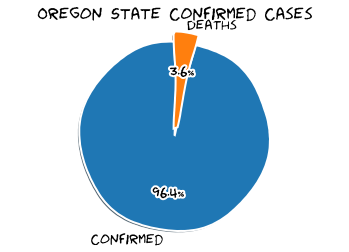

Oregon State Total Population
4190713
Oregon State Confirmed
4302 (0.10265556243054583% of population)
Oregon State Deaths
154 (3.5797303579730357% of confirmed)



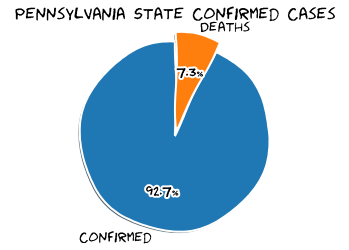

Pennsylvania State Total Population
12807060
Pennsylvania State Confirmed
76646 (0.5984667831649106% of population)
Pennsylvania State Deaths
5567 (7.263262270699059% of confirmed)



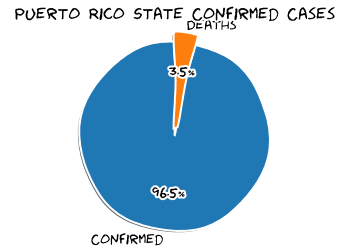

Puerto Rico State Total Population
3195153
Puerto Rico State Confirmed
3873 (0.12121485262208101% of population)
Puerto Rico State Deaths
136 (3.5114898011877096% of confirmed)



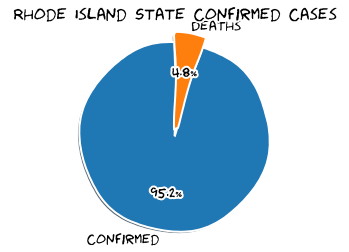

Rhode Island State Total Population
1057315
Rhode Island State Confirmed
14991 (1.4178366901065436% of population)
Rhode Island State Deaths
720 (4.802881729037423% of confirmed)



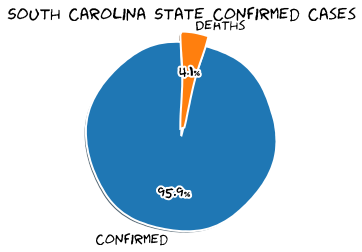

South Carolina State Total Population
5084127
South Carolina State Confirmed
12148 (0.23893974324402206% of population)
South Carolina State Deaths
500 (4.115903852486006% of confirmed)



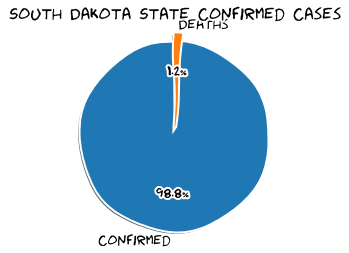

South Dakota State Total Population
882235
South Dakota State Confirmed
5034 (0.5705962697013834% of population)
South Dakota State Deaths
62 (1.2316249503377037% of confirmed)



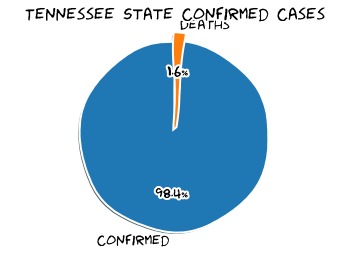

Tennessee State Total Population
6770010
Tennessee State Confirmed
22566 (0.33332299361448503% of population)
Tennessee State Deaths
364 (1.6130461756625012% of confirmed)



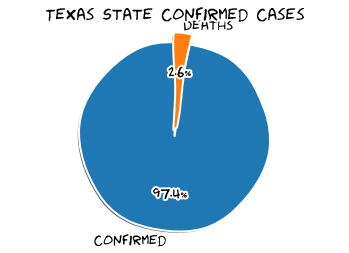

Texas State Total Population
28701845
Texas State Confirmed
65593 (0.22853234696236427% of population)
Texas State Deaths
1683 (2.5658225725306054% of confirmed)



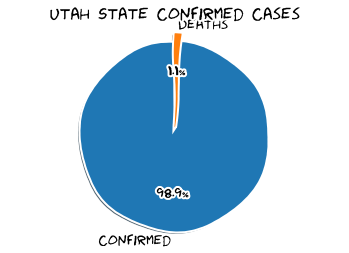

Utah State Total Population
3161105
Utah State Confirmed
9999 (0.3163134410277419% of population)
Utah State Deaths
113 (1.1301130113011302% of confirmed)



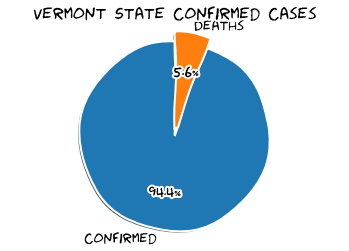

Vermont State Total Population
626299
Vermont State Confirmed
983 (0.15695378724858255% of population)
Vermont State Deaths
55 (5.595116988809766% of confirmed)



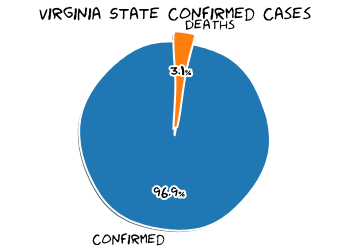

Virginia State Total Population
8517685
Virginia State Confirmed
45398 (0.5329851949209204% of population)
Virginia State Deaths
1392 (3.0662143706771223% of confirmed)



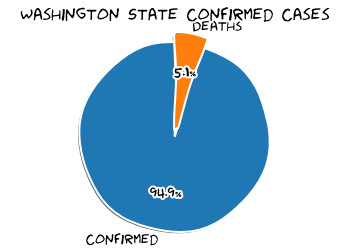

Washington State Total Population
7535591
Washington State Confirmed
21977 (0.29164268602157417% of population)
Washington State Deaths
1123 (5.109887609773855% of confirmed)



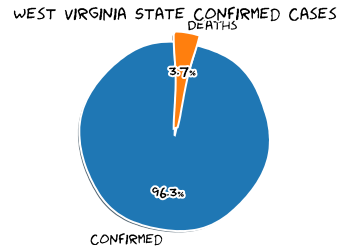

West Virginia State Total Population
1805832
West Virginia State Confirmed
2028 (0.11230280557659848% of population)
West Virginia State Deaths
76 (3.7475345167652856% of confirmed)



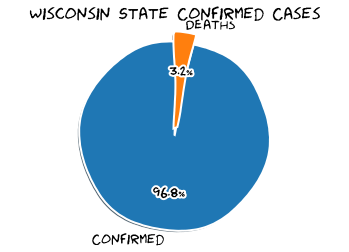

Wisconsin State Total Population
5813568
Wisconsin State Confirmed
18543 (0.31896074837346017% of population)
Wisconsin State Deaths
595 (3.208758021895055% of confirmed)



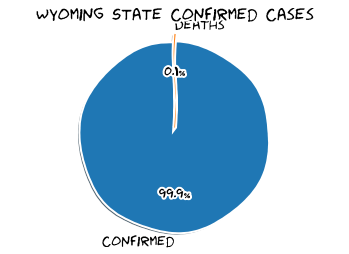

Wyoming State Total Population
577737
Wyoming State Confirmed
910 (0.15751111664996356% of population)
Wyoming State Deaths
1 (0.10989010989010989% of confirmed)



In [10]:
for i in states:
    state_details(i)

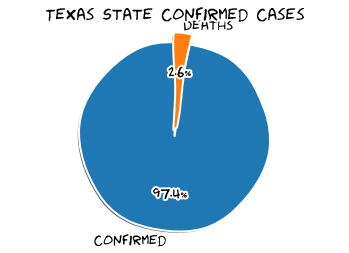

Texas State Total Population
28701845
Texas State Confirmed
65593 (0.22853234696236427% of population)
Texas State Deaths
1683 (2.5658225725306054% of confirmed)



In [11]:
state_details('Texas')

In [12]:
# quick summary
print('US Confirmed')
print(us['confirmed'].sum())
print('US Deaths')
print(us['deaths'].sum())
print('')

ny = us.loc[us['provinceState'] == 'New York']
nyc = ny.loc[ny['admin2'] == 'New York City']
print('New York City Confirmed')
print(nyc['confirmed'].sum())
print('New York City Deaths')
print(nyc['deaths'].sum())
print('')

# create a dataframe of all comfirmed cases
global_confirmed = pd.DataFrame.from_dict(confirmed.json())

ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
print('Philippines Confirmed')
print(ph['confirmed'].sum())
print('Philippines Deaths')
print(ph['deaths'].sum())
print('')

US Confirmed
1811277
US Deaths
104907

New York City Confirmed
203764
New York City Deaths
21607

Philippines Confirmed
18997
Philippines Deaths
966



In [13]:
# show api endpoints
api.json()

{'confirmed': {'detail': 'https://covid19.mathdro.id/api/confirmed',
  'value': 6299759},
 'countries': 'https://covid19.mathdro.id/api/countries',
 'countryDetail': {'example': 'https://covid19.mathdro.id/api/countries/USA',
  'pattern': 'https://covid19.mathdro.id/api/countries/[country]'},
 'dailySummary': 'https://covid19.mathdro.id/api/daily',
 'dailyTimeSeries': {'example': 'https://covid19.mathdro.id/api/daily/2-14-2020',
  'pattern': 'https://covid19.mathdro.id/api/daily/[dateString]'},
 'deaths': {'detail': 'https://covid19.mathdro.id/api/deaths',
  'value': 376177},
 'image': 'https://covid19.mathdro.id/api/og',
 'lastUpdate': '2020-06-02T12:33:03.000Z',
 'recovered': {'detail': 'https://covid19.mathdro.id/api/recovered',
  'value': 2714972},
 'source': 'https://github.com/mathdroid/covid19'}

In [0]:
# get date
yesterday = today - timedelta(days=1)
date = yesterday.strftime('%m-%d-%Y').lstrip('0').replace(' 0', '')

In [15]:
# Get yesterday's data
r = request.get('https://covid19.mathdro.id/api/daily/{}'.format(date))
print(r)
j = r.json()
df = pd.DataFrame.from_dict(j)
df

<Response [200]>


,fips,admin2,provinceState,countryRegion,lastUpdate,lat,long,confirmed,deaths,recovered,active,combinedKey,incidenceRate,case-fatalityRatio
0,45001,Abbeville,South Carolina,US,2020-06-02 02:33:08,34.22333378,-82.46170658,44,0,0,44,"Abbeville, South Carolina, US",179.39413707342928,0.0
1,22001,Acadia,Louisiana,US,2020-06-02 02:33:08,30.2950649,-92.41419698,422,23,0,399,"Acadia, Louisiana, US",680.1515029414135,5.450236966824645
2,51001,Accomack,Virginia,US,2020-06-02 02:33:08,37.76707161,-75.63234615,917,12,0,905,"Accomack, Virginia, US",2837.6036638197797,1.3086150490730644
3,16001,Ada,Idaho,US,2020-06-02 02:33:08,43.4526575,-116.24155159999998,812,22,0,790,"Ada, Idaho, US",168.60920249093104,2.70935960591133
4,19001,Adair,Iowa,US,2020-06-02 02:33:08,41.33075609,-94.47105874,9,0,0,9,"Adair, Iowa, US",125.83892617449665,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3632,,,,West Bank and Gaza,2020-06-02 02:33:08,31.9522,35.2332,449,3,372,74,West Bank and Gaza,8.80147786418516,0.6681514476614699
3633,,,,Western Sahara,2020-06-02 02:33:08,24.2155,-12.8858,9,1,6,2,Western Sahara,1.5067048365225253,11.11111111111111
3634,,,,Yemen,2020-06-02 02:33:08,15.552726999999999,48.516388,354,84,14,256,Yemen,1.186885200171877,23.728813559322035
3635,,,,Zambia,2020-06-02 02:33:08,-13.133897,27.849332,1089,7,912,170,Zambia,5.923643420382425,0.642791551882461


In [16]:
# get all US confirmed cases
us = pd.DataFrame.from_dict(us_confirmed.json())
us

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1591101183000,40.767273,-73.971526,203764,0,21607,182157,New York City,36061,"New York City, New York, US",2444.146249,None,None,84036061,USA
1,Illinois,US,1591101183000,41.841448,-87.816588,78495,0,3658,74837,Cook,17031,"Cook, Illinois, US",1524.105803,None,None,84017031,USA
2,California,US,1591101183000,34.308284,-118.228241,56017,0,2386,53631,Los Angeles,06037,"Los Angeles, California, US",557.987877,None,None,84006037,USA
3,New York,US,1591101183000,40.740665,-73.589419,40479,0,2125,38354,Nassau,36059,"Nassau, New York, US",2983.144229,None,None,84036059,USA
4,New York,US,1591101183000,40.883201,-72.801217,39705,0,1906,37799,Suffolk,36103,"Suffolk, New York, US",2688.945761,None,None,84036103,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,Kansas,US,1591101183000,37.559372,-95.743233,1,0,0,1,Wilson,20205,"Wilson, Kansas, US",11.730205,None,None,84020205,USA
2975,Kentucky,US,1591101183000,37.739416,-83.493036,1,0,0,1,Wolfe,21237,"Wolfe, Kentucky, US",13.972335,None,None,84021237,USA
2976,Arkansas,US,1591101183000,35.189025,-91.243949,1,0,0,1,Woodruff,05147,"Woodruff, Arkansas, US",15.822785,None,None,84005147,USA
2977,Alaska,US,1591101183000,65.508155,-151.390739,1,0,0,1,Yukon-Koyukuk,02290,"Yukon-Koyukuk, Alaska, US",19.120459,None,None,84002290,USA


In [17]:
# return only New York state
ny = us.loc[us['provinceState'] == 'New York']
ny

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1591101183000,40.767273,-73.971526,203764,0,21607,182157,New York City,36061,"New York City, New York, US",2444.146249,None,None,84036061,USA
3,New York,US,1591101183000,40.740665,-73.589419,40479,0,2125,38354,Nassau,36059,"Nassau, New York, US",2983.144229,None,None,84036059,USA
4,New York,US,1591101183000,40.883201,-72.801217,39705,0,1906,37799,Suffolk,36103,"Suffolk, New York, US",2688.945761,None,None,84036103,USA
5,New York,US,1591101183000,41.162784,-73.757417,33552,0,1374,32178,Westchester,36119,"Westchester, New York, US",3467.885470,None,None,84036119,USA
20,New York,US,1591101183000,41.150279,-74.025605,13185,0,646,12539,Rockland,36087,"Rockland, New York, US",4047.097968,None,None,84036087,USA
29,New York,US,1591101183000,41.403375,-74.302408,10422,0,444,9978,Orange,36071,"Orange, New York, US",2707.434925,None,None,84036071,USA
61,New York,US,1591101183000,42.762490,-78.730637,6123,0,524,5599,Erie,36029,"Erie, New York, US",666.483800,None,None,84036029,USA
85,New York,US,1591101183000,41.764861,-73.743567,3924,0,142,3782,Dutchess,36027,"Dutchess, New York, US",1333.704940,None,None,84036027,USA
105,New York,US,1591101183000,43.146389,-77.693229,2964,0,216,2748,Monroe,36055,"Monroe, New York, US",399.584777,None,None,84036055,USA
134,New York,US,1591101183000,43.004919,-76.199712,2197,0,139,2058,Onondaga,36067,"Onondaga, New York, US",477.061112,None,None,84036067,USA


In [18]:
ny_total_confirmed = ny['confirmed'].sum()
ny_total_confirmed

371711

In [19]:
# return only New York City
nyc = ny.loc[ny['admin2'] == 'New York City']
nyc

,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3
0,New York,US,1591101183000,40.767273,-73.971526,203764,0,21607,182157,New York City,36061,"New York City, New York, US",2444.146249,None,None,84036061,USA


In [20]:
# show all Philippines confirmed
# ph = pd.DataFrame.from_dict(ph_confirmed.json())
ph = global_confirmed.loc[global_confirmed['countryRegion'] == 'Philippines']
ph


,provinceState,countryRegion,lastUpdate,lat,long,confirmed,recovered,deaths,active,admin2,fips,combinedKey,incidentRate,peopleTested,peopleHospitalized,uid,iso3,iso2
58,None,Philippines,1591101183000,12.879721,121.774017,18997,4063,966,13968,None,None,Philippines,17.336021,None,None,608.0,PHL,PH


In [21]:
pop
pop.loc[pop['State'] == 'Texas']

,ID State,State,ID Year,Year,Population,Slug State
43,04000US48,Texas,2018,2018,28701845,texas
